In [212]:
import numpy as np 
import matplotlib.pyplot as plt
from generators.binom_gen import Binom_gen
from generators.poisson_gen import Poisson_gen
from hypothesis import param

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <center> Binomial generator

### Define dict of experiments

Key is name of experiment, and values is parameters of experiment

In [4]:
binom_experiments = {
    'm4_p01' : {'m' : 4, 'p' : 0.1},
    'm4_p05' : {'m' : 4, 'p' : 0.5},
    'm4_p09' : {'m' : 4, 'p' : 0.9},
}


desirable_sizes = [40, 100]

### Perform experiments with binomial distribution

[1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0
 1 0 2]
[3 0 2 3 2 2 2 4 1 3 2 2 2 1 3 2 4 1 1 0 3 1 1 2 2 1 1 0 1 2 2 3 2 2 2 4 2
 3 1 4]
[4 3 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 3 3 2 4 3 3 4 4 3 3 2 3 4 3 4 4 4 4 4 4
 4 3 4]


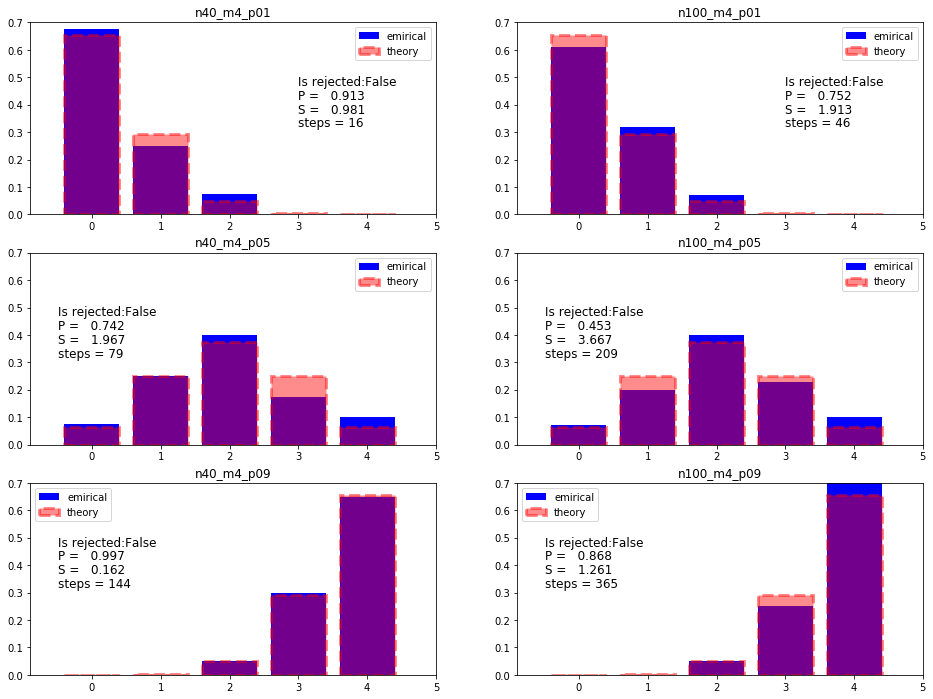

In [203]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
plotted_row = 0

for name, params in binom_experiments.items():
    for idx, size in enumerate(desirable_sizes):
        bnm = Binom_gen(m = params['m'], p = params['p'])
        seq, steps = bnm.generate(size)

        uniq, counts = np.unique(seq, return_counts=True)
        for elem in range(0, params['m'] + 1 - len(uniq)):
            if params['p'] > 0.5:
                uniq = np.insert(uniq, elem, elem)
                counts = np.insert(counts, elem, 0)
            else:
                uniq = np.append(uniq, len(uniq))
                counts = np.append(counts, 0)

        n = np.sum(counts)
        empiric_freq = counts / n
        is_rej, s, p = param.chisquare(uniq, empiric_freq, bnm._prob_row, n, 0.05)

        plt.ylim(-0.0, 0.8)
        plt.xlim(-.9, 5)

        if params['p'] < .5:
            text_x = 3 
        else:
            text_x = -0.5
            
        if size == 40:
            print(seq)

        ax = axes[plotted_row, idx]
        ax.set_ylim((0, 0.7))
        ax.set_xlim((-0.9, 5))
        ax.bar(uniq, empiric_freq, color='blue', label='emirical')
        ax.bar(uniq, bnm._prob_row, alpha=0.45, color='red', edgecolor='red', linewidth=3, linestyle='--', label='theory')
        ax.text(text_x, 0.32, 'steps = %d' % (steps), fontdict={'size': 12})
        ax.text(text_x, 0.37, 'S = % 7.3f' % (s), fontdict={'size': 12})
        ax.text(text_x, 0.42, 'P = % 7.3f' % (p), fontdict={'size': 12})
        ax.text(text_x, 0.47, 'Is rejected:' + str(is_rej), fontdict={'size': 12})
        ax.set_title('n' + str(size) + '_' + name)
        ax.legend() 
        
    plotted_row += 1
        
plt.show() 

<br><br>

-----
## <center> Poisson generator

### Define dict of experiments

In [213]:
poisson_experiments = {
    'lambda2_k10' : {'lambda' : 2, 'k' : 10},
    'lambda2_kNone' : {'lambda' : 2, 'k' : None},
}


desirable_sizes = [40, 100]

### Perform experiments with Poisson distribution

[2 1 0 4 3 1 4 2 2 0 1 3 1 1 3 2 4 1 1 3 6 2 2 3 1 1 0 0 0 5 3 3 2 1 1 2 2
 2 5 2]
[1 4 0 0 2 1 2 2 1 3 0 1 2 2 0 1 0 2 2 1 3 2 1 1 3 1 0 2 3 2 2 3 1 3 4 3 2
 2 1 4]


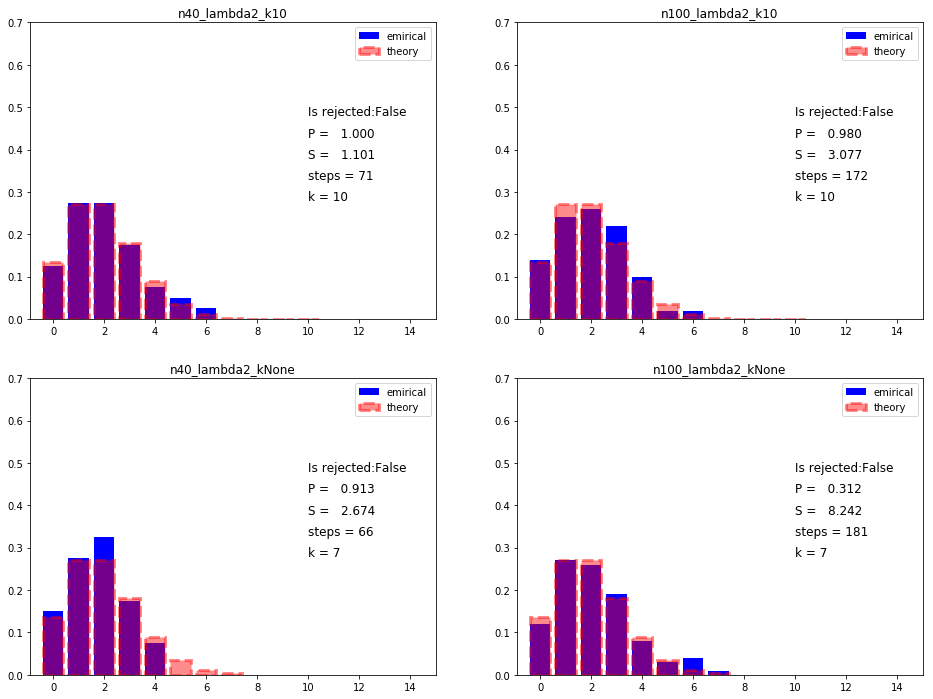

In [228]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plotted_row = 0

for name, params in poisson_experiments.items():
    for idx, size in enumerate(desirable_sizes):
        poisson = Poisson_gen(alpha = params['lambda'], k = params['k'])
        seq, steps = poisson.generate(size)

        uniq, counts = np.unique(seq, return_counts=True)
        
        if params['k'] is None:
            params['k'] = poisson._k
        
        for elem in range(0, params['k'] + 1 - len(uniq)):
                uniq = np.append(uniq, len(uniq))
                counts = np.append(counts, 0)

        if size == 40:
            print(seq)
            
        n = np.sum(counts)
        empiric_freq = counts / n
        
        is_rej, s, p = param.chisquare(uniq, empiric_freq, poisson._prob_row, n, 0.05)

        plt.ylim(-0.0, 0.7)
        plt.xlim(-.9, 16)

        text_x = 10
        ax = axes[plotted_row, idx]
        ax.set_ylim((0, 0.7))
        ax.set_xlim((-0.9, 15))
        ax.bar(uniq, empiric_freq, color='blue', label='emirical')
        ax.bar(uniq, poisson._prob_row, alpha=0.45, color='red', edgecolor='red', linewidth=3, linestyle='--', label='theory')
        ax.text(text_x, 0.48, 'Is rejected:' + str(is_rej), fontdict={'size': 12})
        ax.text(text_x, 0.43, 'P = % 7.3f' % (p), fontdict={'size': 12})
        ax.text(text_x, 0.38, 'S = % 7.3f' % (s), fontdict={'size': 12})
        ax.text(text_x, 0.33, 'steps = %d' % (steps), fontdict={'size': 12})
        ax.text(text_x, 0.28, 'k = %d' % (poisson.k), fontdict={'size': 12})
        ax.set_title('n' + str(size) + '_' + name)
        ax.legend() 
        
    plotted_row += 1
        
        
plt.show() 